# 1.Read Data

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
# load dataframe
original_df = pd.read_csv('/Users/yingjiang/Desktop/5291proj/5291project/data/KaggleV2.csv')

# 2.Data preprocessing

In [25]:
# explore data
original_df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [26]:
# explore data
original_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [27]:
# explore data
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## 2.1Data cleaning

In [28]:
# Convert AppointmentDay to AppointmentDayofWeek

In [29]:
original_df['AppointmentDay'] = pd.to_datetime(original_df['AppointmentDay'])
original_df['AppointmentDayofWeek'] = original_df['AppointmentDay'].dt.dayofweek

In [30]:
# Remove the row with Age = -1, since it makes no sense that the patient has a negative age

In [31]:
original_df = original_df[original_df['Age'] != -1]

In [32]:
# get target variable, no-show as 1
original_df['No-show'] = original_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

In [33]:
# 0 as Female, 1 as male
original_df['Gender'] = original_df['Gender'].apply(lambda g: 1 if g == 'M' else 0) 

## 2.2Data exploring 

In [34]:
#explore data after cleaning
original_df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDayofWeek
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,4


In [35]:
#create new dataframe
df = pd.DataFrame()

In [36]:
#edit some misspelling
df['No-show'] = original_df['No-show']
df['Age'] = original_df['Age']
df['Gender'] = original_df['Gender']
df['Diabetes'] = original_df['Diabetes']
df['Alcoholism'] = original_df['Alcoholism']
df['Hypertension'] = original_df['Hipertension']
df['Handicap'] = original_df['Handcap']
df['Scholarship'] = original_df['Scholarship']
df['SMS_received'] = original_df['SMS_received']
df['AppointmentDayofWeek'] = original_df['AppointmentDayofWeek']

In [37]:
# one-hot neighbourhood
df['Neighbourhood'] = original_df['Neighbourhood']
factorize = pd.factorize(df['Neighbourhood'])
df['Neighbourhood'] = factorize[0]

In [38]:
df.shape

(110526, 11)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   No-show               110526 non-null  int64
 1   Age                   110526 non-null  int64
 2   Gender                110526 non-null  int64
 3   Diabetes              110526 non-null  int64
 4   Alcoholism            110526 non-null  int64
 5   Hypertension          110526 non-null  int64
 6   Handicap              110526 non-null  int64
 7   Scholarship           110526 non-null  int64
 8   SMS_received          110526 non-null  int64
 9   AppointmentDayofWeek  110526 non-null  int64
 10  Neighbourhood         110526 non-null  int64
dtypes: int64(11)
memory usage: 10.1 MB


### 2.2.1target value

1    88207
0    22319
Name: No-show, dtype: int64
Proportion of No-shows: 20.19%
Proportion of Shows: 79.81%


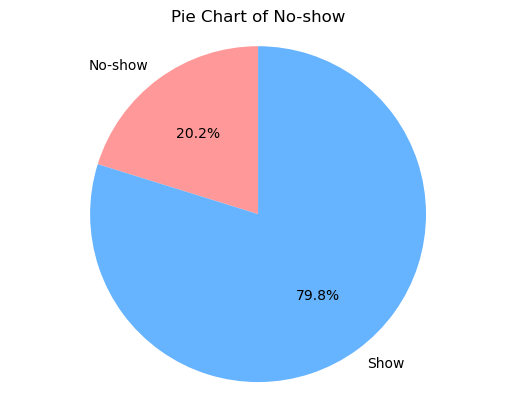

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Display the value counts of the No-show variable
print(df['No-show'].value_counts())

# Calculate the proportion of No-shows and Shows
no_show_prop = sum(df['No-show'] == 0)/df.shape[0]
show_prop = sum(df['No-show'] == 1)/df.shape[0]
print("Proportion of No-shows: {:.2f}%".format(no_show_prop*100))
print("Proportion of Shows: {:.2f}%".format(show_prop*100))

# Create a pie chart to visualize the distribution of No-shows
labels = ['No-show', 'Show']
sizes = [no_show_prop, show_prop]
colors = ['#ff9999', '#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Pie Chart of No-show")
plt.savefig('No-show_pie.png', dpi=300)
plt.show()


## 2.2.2SMS_received

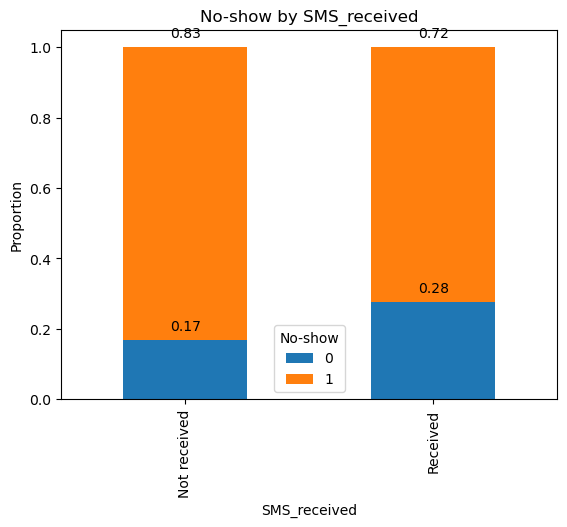

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a crosstab of No-show and SMS_received variables
cross_tab = pd.crosstab(index=df['SMS_received'], columns=df['No-show'])

# Normalize the crosstab to get the proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create the stacked bar chart with proportion labels
ax = cross_tab_prop.plot(kind='bar', stacked=True)
ax.set_xticklabels(['Not received', 'Received'])
ax.set_xlabel('SMS_received')
ax.set_ylabel('Proportion')
ax.set_title('No-show by SMS_received')

# Add proportion labels to the chart
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5, labels=[f'{x:.2f}' for x in i.datavalues])

plt.legend(loc='best', title='No-show')
plt.grid(False)
plt.show()

## 2.2.3Age

No-show Age summary statistics:
count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

Show Age summary statistics:
count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64


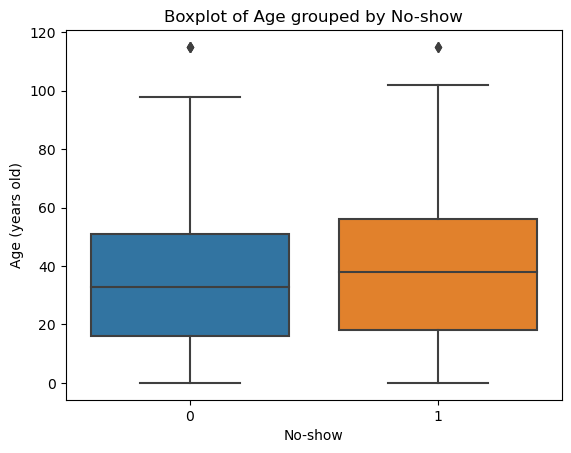

In [42]:
import seaborn as sns
import pandas as pd

# Create boxplot of Age grouped by No-show
ax = sns.boxplot(x='No-show', y='Age', data=df)
ax.set_title("Boxplot of Age grouped by No-show")
ax.set_ylabel('Age (years old)')
ax.set_xlabel('No-show')
plt.grid(False)

# Display the data
no_show_age = df[df['No-show'] == 1]['Age']
show_age = df[df['No-show'] == 0]['Age']
print("No-show Age summary statistics:")
print(no_show_age.describe())
print()
print("Show Age summary statistics:")
print(show_age.describe())

plt.show()


## 2.2.4AppointmentDayofWeek

no_show_count:
AppointmentDayofWeek
0    18024
1    20488
2    20774
3    13909
4    14982
5       30
Name: No-show, dtype: int64
total_appointments:
AppointmentDayofWeek
0    22714
1    25640
2    25867
3    17247
4    19019
5       39
Name: No-show, dtype: int64
no_show_proportion:
AppointmentDayofWeek
0    0.793519
1    0.799064
2    0.803108
3    0.806459
4    0.787739
5    0.769231
Name: No-show, dtype: float64


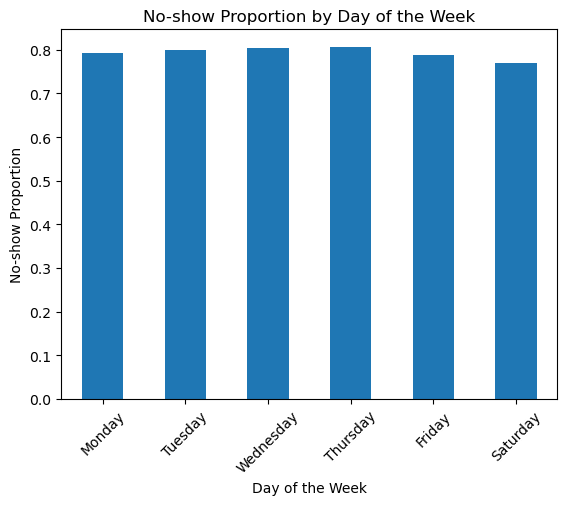

In [43]:
# Count the no-show occurrences and the total appointments per day of the week
no_show_count = df.groupby("AppointmentDayofWeek")["No-show"].sum()
total_appointments = df.groupby("AppointmentDayofWeek")["No-show"].count()
print("no_show_count:")
print(no_show_count)
print("total_appointments:")
print(total_appointments)

# Calculate the proportion of no-shows
no_show_proportion = no_show_count / total_appointments
print('no_show_proportion:')
print(no_show_proportion)

# Create a bar chart
fig, ax = plt.subplots()
no_show_proportion.plot(kind="bar", ax=ax)

# Set labels and title
ax.set_xlabel("Day of the Week")
ax.set_ylabel("No-show Proportion")
ax.set_title("No-show Proportion by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=45)

# Show the chart
plt.grid(False)
plt.show()

## 2.2.5Gender

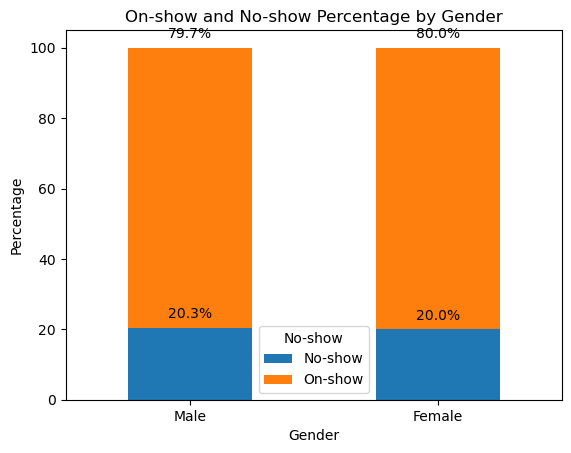

In [47]:
# Calculate the proportion of on-show and no-show per gender
gender_proportions = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
# Create a stacked bar chart
fig, ax = plt.subplots() 
gender_proportions.plot(kind="bar", stacked=True, ax=ax)
# Add text labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type="edge", labels=[f"{val:.1f}%" for val in i.datavalues], padding=5)
# Set labels and title
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")
ax.set_title("On-show and No-show Percentage by Gender") 
ax.set_xticklabels(["Male", "Female"], rotation=0)
# Add a legend
ax.legend(["No-show", "On-show"], title="No-show")
# Show the chart
plt.grid(False) 
plt.show()

## 2.2.6correlation

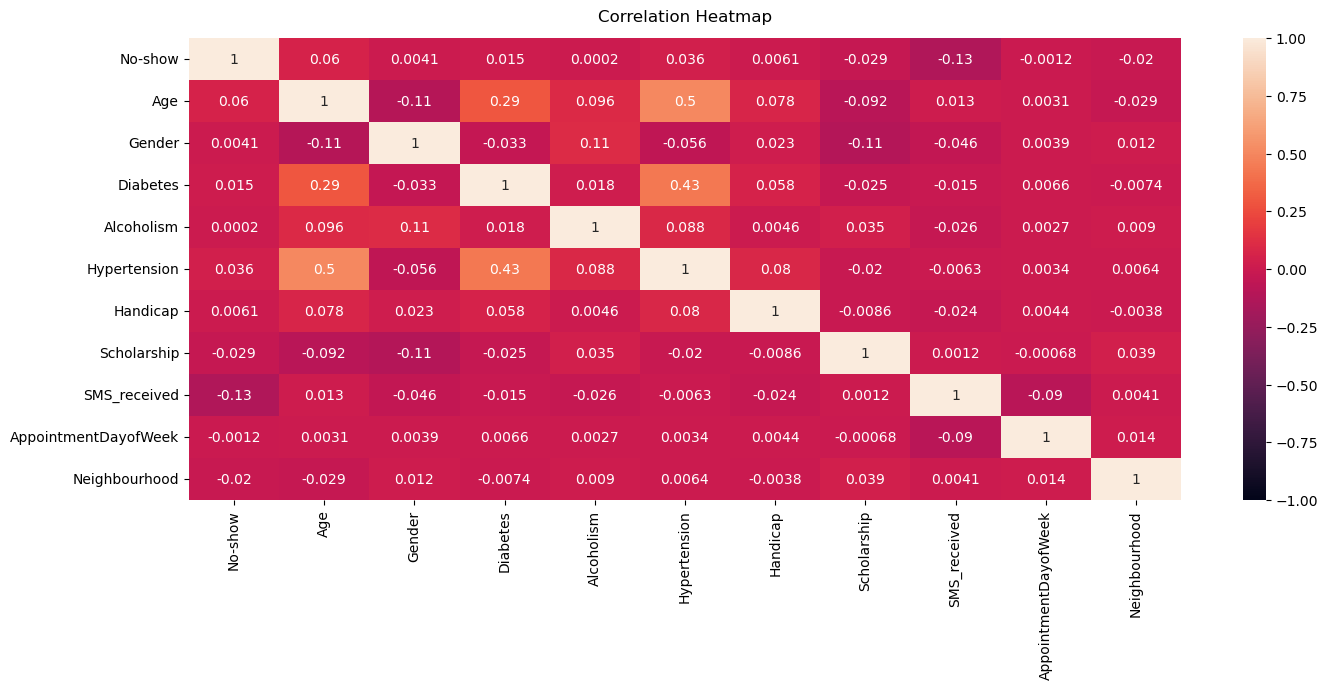

In [48]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [49]:
df.corr()

,No-show,Age,Gender,Diabetes,Alcoholism,Hypertension,Handicap,Scholarship,SMS_received,AppointmentDayofWeek,Neighbourhood
No-show,1.000000,0.060327,0.004122,0.015181,0.000197,0.035704,0.006077,-0.029134,-0.126428,-0.001158,-0.019962
Age,0.060327,1.000000,-0.106452,0.292391,0.095810,0.504586,0.078032,-0.092463,0.012633,0.003068,-0.029368
Gender,0.004122,-0.106452,1.000000,-0.032556,0.106166,-0.055722,0.022813,-0.114296,-0.046302,0.003907,0.012151
Diabetes,0.015181,0.292391,-0.032556,1.000000,0.018473,0.433085,0.057530,-0.024894,-0.014552,0.006611,-0.007378
Alcoholism,0.000197,0.095810,0.106166,0.018473,1.000000,0.087970,0.004647,0.035022,-0.026149,0.002699,0.008988
Hypertension,0.035704,0.504586,-0.055722,0.433085,0.087970,1.000000,0.080083,-0.019730,-0.006270,0.003449,0.006376
Handicap,0.006077,0.078032,0.022813,0.057530,0.004647,0.080083,1.000000,-0.008587,-0.024162,0.004350,-0.003759
Scholarship,-0.029134,-0.092463,-0.114296,-0.024894,0.035022,-0.019730,-0.008587,1.000000,0.001192,-0.000677,0.038913
SMS_received,-0.126428,0.012633,-0.046302,-0.014552,-0.026149,-0.006270,-0.024162,0.001192,1.000000,-0.089867,0.004143
AppointmentDayofWeek,-0.001158,0.003068,0.003907,0.006611,0.002699,0.003449,0.004350,-0.000677,-0.089867,1.000000,0.014355


In [617]:
#Conclusion: From the correlation matrix provided, it seems that the strongest correlation is between 'Age' and 'Hypertension' (0.504586). However, this correlation is not very strong, and it might not be necessary to remove either of the variables from the model. Generally, a correlation coefficient above 0.7 or 0.8 might be considered a strong correlation, warranting the removal of one of the variables to avoid multicollinearity issues.

# 3. Data splitting and feature selection

## 3.1Data Splitting and Feature Selection

In [51]:
# prepare X and Y
X = df.drop(['No-show','AppointmentDayofWeek','Gender'], axis=1)
y = df['No-show']

In [52]:
X.columns

Index(['Age', 'Diabetes', 'Alcoholism', 'Hypertension', 'Handicap',
       'Scholarship', 'SMS_received', 'Neighbourhood'],
      dtype='object')

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Set the random seed for reproducibility
random_state = 123

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,
                    train_size = 0.6,random_state = random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,
                    train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

print(X_train.head())

random_state = 123
k = 7  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X_train, y_train)

# Get the mask of the selected features
selected_features = selector.get_support()

# Get the feature names
feature_names = np.array(X_train.columns)

# Print the selected features
print("Selected features:")
print(feature_names[selected_features])

training set: (66315, 8) (66315,)
(44211, 8) (44211,)
validation set: (22105, 8) (22105,)
test set: (22106, 8) (22106,)
       Age  Diabetes  Alcoholism  Hypertension  Handicap  Scholarship  \
40713   39         0           0             0         0            0   
39653   29         0           0             0         0            0   
4358    50         0           0             0         0            0   
8498    38         0           0             0         0            0   
95884   13         0           0             0         0            0   

       SMS_received  Neighbourhood  
40713             0             44  
39653             0             26  
4358              1             21  
8498              0             38  
95884             0             62  
Selected features:
['Age' 'Diabetes' 'Hypertension' 'Handicap' 'Scholarship' 'SMS_received'
 'Neighbourhood']


In [54]:
#Conclusion: we chose the selected features as following: ['Age' 'Alcoholism' 'Hypertension' 'Handicap' 'Scholarship' 'SMS_received'
 #'Neighbourhood']

## 3.2Preprocessing the Selected Features

In [55]:
# Get the selected features
selected_features = X.columns.isin(feature_names[selected_features])

# Transform the original X_train, X_val, and X_test to have only the selected features
X_train_selected = X_train.loc[:, selected_features]
X_val_selected = X_val.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

In [56]:
X_train_selected.columns

Index(['Age', 'Diabetes', 'Hypertension', 'Handicap', 'Scholarship',
       'SMS_received', 'Neighbourhood'],
      dtype='object')

In [57]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# let's collect all categorical features first
onehot_ftrs = ['Neighbourhood']
minmax_ftrs = ['Age']
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
prep = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = prep.fit_transform(X_train_selected)
X_val_prep = prep.transform(X_val_selected)
X_test_prep = prep.transform(X_test_selected)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(66315, 8)
(66315, 82)
[[0.         0.         0.         ... 0.         0.         0.33913043]
 [0.         0.         0.         ... 0.         0.         0.25217391]
 [0.         0.         0.         ... 0.         0.         0.43478261]
 ...
 [0.         0.         0.         ... 0.         0.         0.28695652]
 [0.         0.         0.         ... 0.         0.         0.23478261]
 [0.         0.         0.         ... 0.         0.         0.09565217]]


In [58]:
X_train_prep

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33913043],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25217391],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.43478261],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.28695652],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.23478261],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09565217]])

# 4.model


## 4.1logistic model

## 4.2Assumptions of Logistic Regression

In [59]:
#Assumption2: The Observations are Independent

In [60]:
#checking duplicates

In [61]:
duplicate_rows = original_df[original_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show, AppointmentDayofWeek]
Index: []


In [62]:
#Assumption3: There is No Multicollinearity Among Explanatory Variables

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a DataFrame containing only the explanatory variables
X = df.drop('No-show', axis=1)

# calculate the VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print the results
print(vif)

                feature       VIF
0                   Age  3.456473
1                Gender  1.449365
2              Diabetes  1.339857
3            Alcoholism  1.061781
4          Hypertension  1.884349
5              Handicap  1.029597
6           Scholarship  1.106535
7          SMS_received  1.389077
8  AppointmentDayofWeek  2.294255
9         Neighbourhood  2.567986


In [64]:
#Conclusion: Based on the VIF values, it seems that there is no significant multicollinearity among the explanatory variables. All the VIF values are below 5, which is a commonly used threshold for identifying multicollinearity. Therefore, you can conclude that the logistic regression assumption of no multicollinearity is met for this dataset.

In [65]:
#Assumption #5: There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a logistic regression model using the encoded training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_prep, y_train)

LogisticRegression(solver='liblinear')

In [67]:
#since we have one continuous variable--Age,we have to check the statistical significance of the interaction terms (Age: Log_Age ) based on their p-values.

In [68]:
# Create a copy of the dataset
X_bt = X_train.copy()

# Add a small constant to 'Age' to avoid taking the logarithm of zero
X_bt['Age'] += 0.001

# Calculate the natural logarithm of 'Age'
X_bt['log_Age'] = np.log(X_bt['Age'])

# Add the interaction term
X_bt['Age_log_Age'] = X_bt['Age'] * X_bt['log_Age']

# Fit the logistic regression model with the interaction term
log_reg_bt = LogisticRegression(solver='liblinear')
log_reg_bt.fit(X_bt, y_train)

LogisticRegression(solver='liblinear')

In [69]:
import statsmodels.api as sm

# Fit the logistic regression model using the statsmodels library for easier output
logit_model_bt = sm.Logit(y_train, sm.add_constant(X_bt))
result_bt = logit_model_bt.fit()

# Print the summary of the model
print(result_bt.summary())

Optimization terminated successfully.
         Current function value: 0.489831
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                No-show   No. Observations:                66315
Model:                          Logit   Df Residuals:                    66304
Method:                           MLE   Df Model:                           10
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                 0.02264
Time:                        13:42:54   Log-Likelihood:                -32483.
converged:                       True   LL-Null:                       -33235.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6967      0.039     42.980      0.000       1.619       1.774
Age              -0.

## 4.2Perform the model

In [70]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_prep, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test_prep)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 score: {f1:.4f}")


Accuracy: 0.7973
Precision: 0.7973
F1 score: 0.8872


In [71]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_prep, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_val_prep)

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 score: {f1:.4f}")

Accuracy: 0.7947
Precision: 0.7947
F1 score: 0.8856
